In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
df = pd.read_csv('your_file_utf8.csv', encoding='utf-8')
df

,Unnamed: 0,id,premium,name,has_test,response_letter_required,type,published_at,created_at,archived,...,professional_roles,accept_incomplete_resumes,experience,employment,is_adv_vacancy,branding,salary.from,salary.to,salary.currency,salary.gross
0,0,108052166,True,"data scientist, маркетплейс, контент и товары",False,False,open,2024-10-02T12:56:57+0300,2024-10-02T12:56:57+0300,False,...,"[{""id"": ""40"", ""name"": ""Другое""}]",False,between1And3,full,False,"{'type': 'MAKEUP', 'tariff': None}",60000,60000,Unknown,False
1,1,103923283,True,"разработчик go, сapacity planning",False,False,open,2024-10-09T17:42:05+0300,2024-10-09T17:42:05+0300,False,...,"[{""id"": ""96"", ""name"": ""Программист, разработчи...",False,between1And3,full,False,"{'type': 'MAKEUP', 'tariff': None}",50000,70000,Unknown,False
2,2,82990809,True,эксперт по клиентской аналитике и отчетности,False,False,open,2024-10-22T18:23:16+0300,2024-10-22T18:23:16+0300,False,...,"[{""id"": ""156"", ""name"": ""BI-аналитик, аналитик ...",False,noExperience,full,False,"{'type': 'MAKEUP', 'tariff': None}",45000,45000,Unknown,False
3,3,108451443,True,project manager (управление по обработке обращ...,False,False,open,2024-10-10T10:53:20+0300,2024-10-10T10:53:20+0300,False,...,"[{""id"": ""71"", ""name"": ""Менеджер по работе с па...",False,between1And3,full,False,"{'type': 'MAKEUP', 'tariff': None}",82000,82000,Unknown,False
4,4,107662854,True,"финансовый аналитик, fashion",False,False,open,2024-10-15T14:15:49+0300,2024-10-15T14:15:49+0300,False,...,"[{""id"": ""134"", ""name"": ""Финансовый аналитик, и...",False,between1And3,full,False,"{'type': 'MAKEUP', 'tariff': None}",32000,50000,Unknown,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5092,5092,108984804,True,портфельный риск-аналитик,False,False,open,2024-10-21T16:10:32+0300,2024-10-21T16:10:32+0300,False,...,"[{""id"": ""156"", ""name"": ""BI-аналитик, аналитик ...",False,between3And6,full,False,"{'type': 'MAKEUP', 'tariff': None}",61000,120000,Unknown,False
5093,5093,108987414,True,риск-менеджер,False,False,open,2024-10-21T16:39:35+0300,2024-10-21T16:39:35+0300,False,...,"[{""id"": ""10"", ""name"": ""Аналитик""}]",False,between1And3,full,False,"{'type': 'MAKEUP', 'tariff': None}",44000,44000,Unknown,False
5094,5094,107218258,True,специалист по товародвижению рц,False,False,open,2024-10-16T17:51:33+0300,2024-10-16T17:51:33+0300,False,...,"[{""id"": ""40"", ""name"": ""Другое""}]",False,between1And3,full,False,"{'type': 'MAKEUP', 'tariff': None}",60000,84000,RUR,True
5095,5095,107218258,True,специалист по товародвижению рц,False,False,open,2024-10-16T17:51:33+0300,2024-10-16T17:51:33+0300,False,...,"[{""id"": ""40"", ""name"": ""Другое""}]",False,between1And3,full,False,"{'type': 'MAKEUP', 'tariff': None}",60000,90000,RUR,True


In [3]:
def safe_json_loads(x):
    try:
        return json.loads(x)
    except json.JSONDecodeError:
        return None

# Преобразование JSON строк в словари
df['employer'] = df['employer'].apply(safe_json_loads)
df['professional_roles'] = df['professional_roles'].apply(lambda x: safe_json_loads(x.replace('""', '"')))


# Преобразование дат
df['published_at'] = pd.to_datetime(df['published_at'])
df['created_at'] = pd.to_datetime(df['created_at'])

# Извлечение значения name из столбца schedule
df['schedule_name']=df['schedule'].apply(lambda x: x.split()[1])

# Преобразование столбцов зарплаты в числовые значения и обработка пропущенных значений
df['salary.from'] = pd.to_numeric(df['salary.from'], errors='coerce')
df['salary.to'] = pd.to_numeric(df['salary.to'], errors='coerce')

# Удаление строк с пропущенными значениями в столбцах зарплаты
df = df.dropna(subset=['salary.from', 'salary.to'])

# Сравнительный анализ премиум и обычных вакансий
premium_vacancies = df[df['premium'] == True]
regular_vacancies = df[df['premium'] == False]


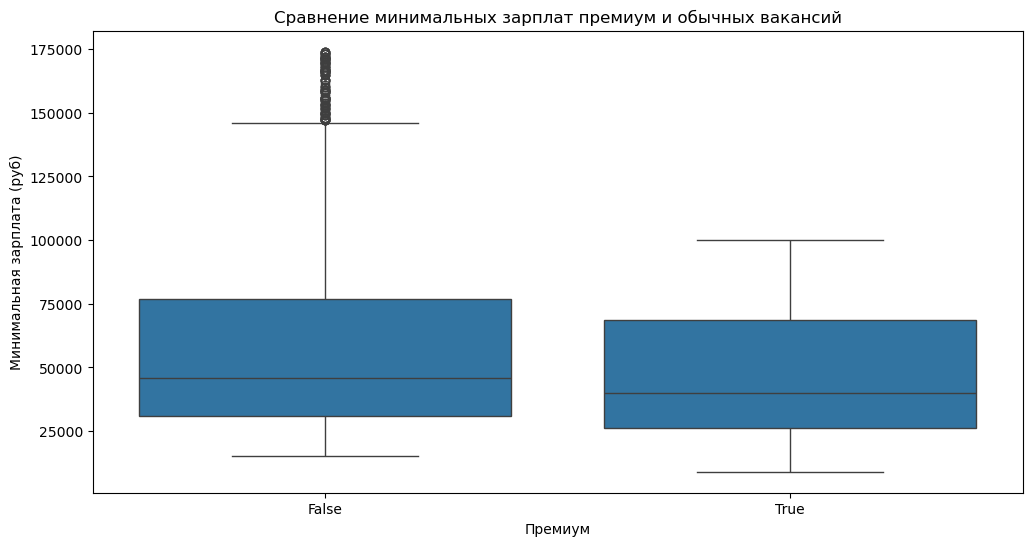

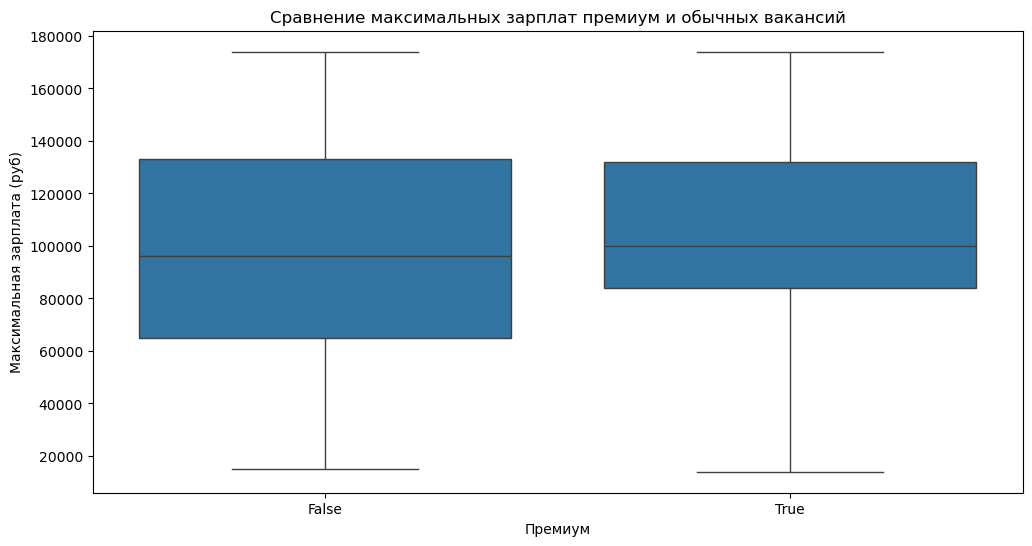

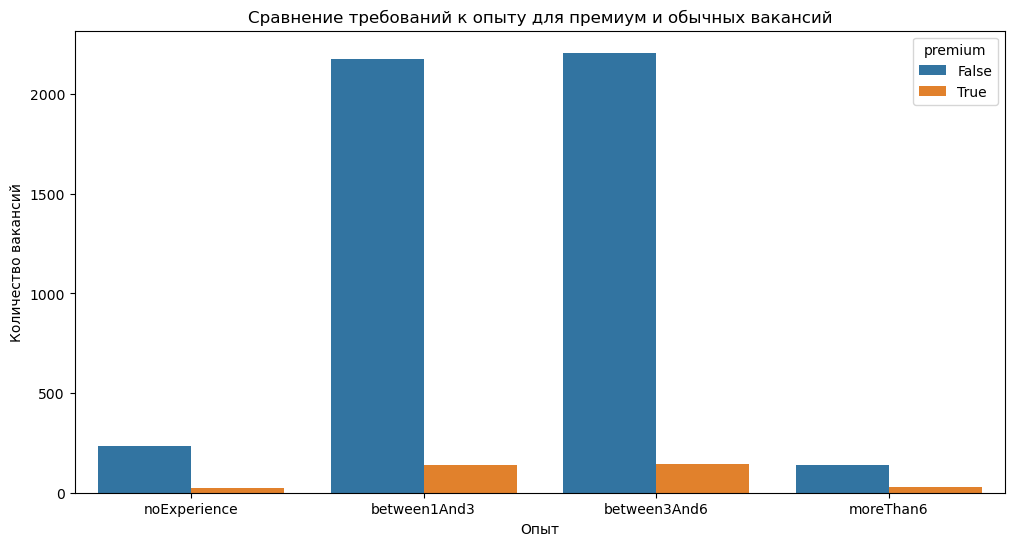

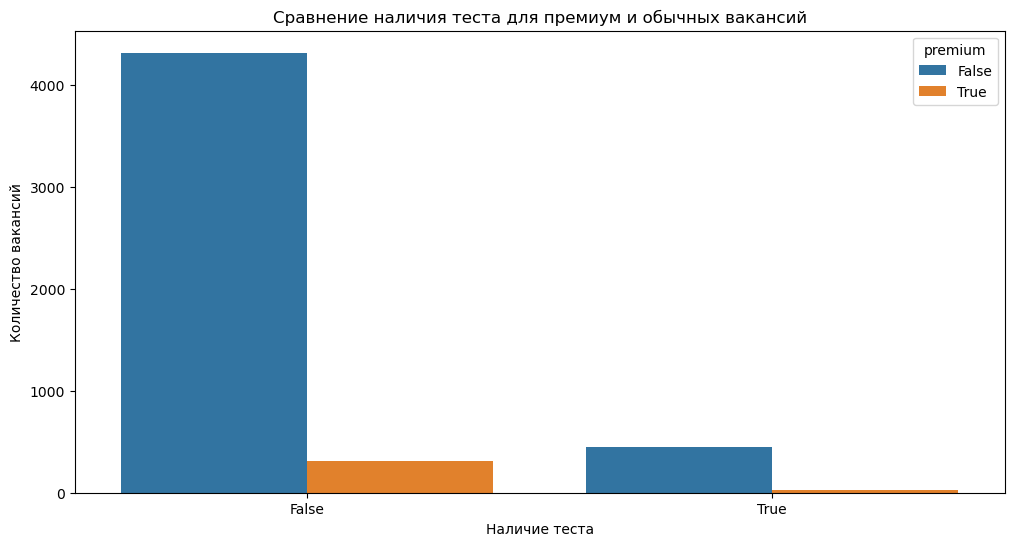

In [22]:
# Анализ зарплат
experience_order = ['noExperience', 'between1And3', 'between3And6', 'moreThan6']

plt.figure(figsize=(12, 6))
sns.boxplot(x='premium', y='salary.from', data=df)
plt.title('Сравнение минимальных зарплат премиум и обычных вакансий')
plt.xlabel('Премиум')
plt.ylabel('Минимальная зарплата (руб)')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='premium', y='salary.to', data=df)
plt.title('Сравнение максимальных зарплат премиум и обычных вакансий')
plt.xlabel('Премиум')
plt.ylabel('Максимальная зарплата (руб)')
plt.show()

# Анализ требований к опыту
plt.figure(figsize=(12, 6))
sns.countplot(x='experience', hue='premium', data=df, order=experience_order)
plt.title('Сравнение требований к опыту для премиум и обычных вакансий')
plt.xlabel('Опыт')
plt.ylabel('Количество вакансий')
plt.show()

# Анализ наличия теста или сопроводительного письма
plt.figure(figsize=(12, 6))
sns.countplot(x='has_test', hue='premium', data=df)
plt.title('Сравнение наличия теста для премиум и обычных вакансий')
plt.xlabel('Наличие теста')
plt.ylabel('Количество вакансий')
plt.show()

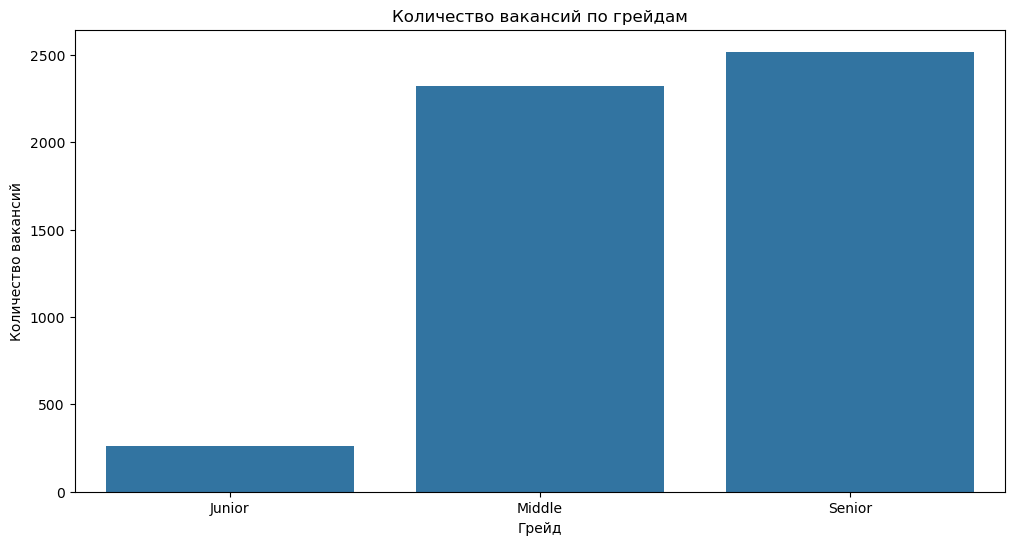

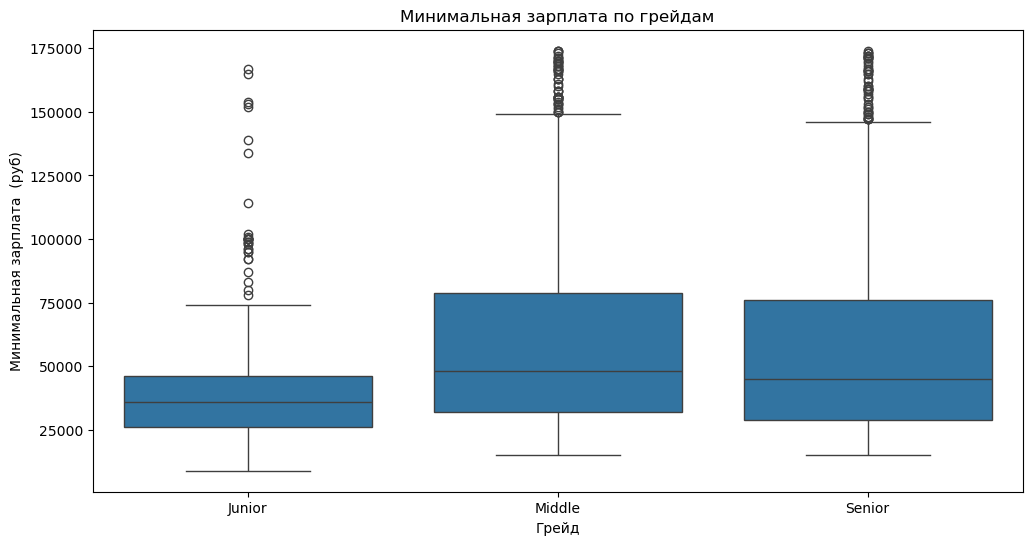

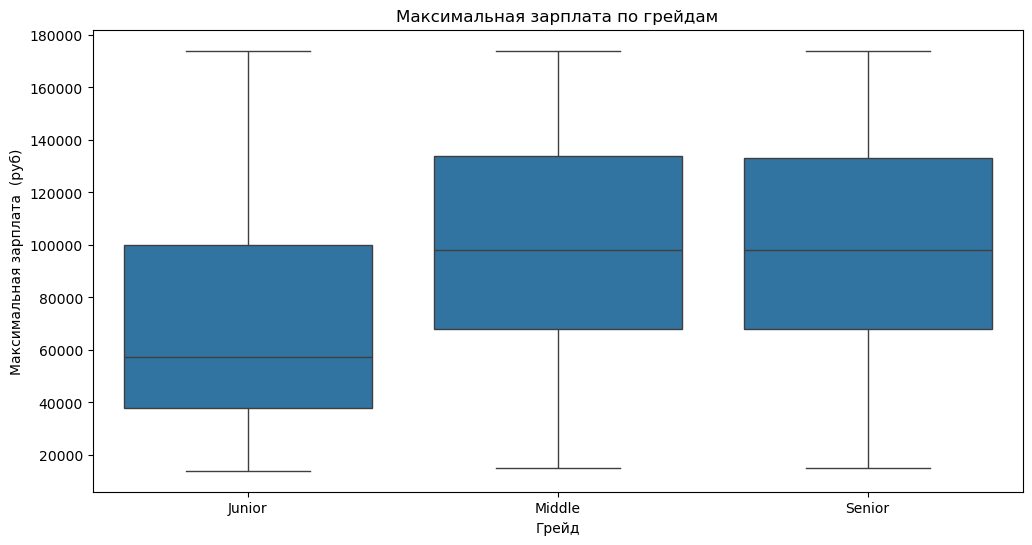

In [13]:
# Анализ потребности в работниках разных грейдов
grade_mapping = {
    'noExperience': 'Junior',
    'between1And3': 'Middle',
    'between3And6': 'Senior',
    'moreThan6': 'Senior'
}
df['grade'] = df['experience'].map(grade_mapping)

grade_order = ['Junior', 'Middle', 'Senior']

plt.figure(figsize=(12, 6))
sns.countplot(x='grade', data=df, order=grade_order)
plt.title('Количество вакансий по грейдам')
plt.xlabel('Грейд')
plt.ylabel('Количество вакансий')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='grade', y='salary.from', data=df, order=grade_order)
plt.title('Минимальная зарплата по грейдам')
plt.xlabel('Грейд')
plt.ylabel('Минимальная зарплата  (руб)')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='grade', y='salary.to', data=df, order=grade_order)
plt.title('Максимальная зарплата по грейдам')
plt.xlabel('Грейд')
plt.ylabel('Максимальная зарплата  (руб)')
plt.show()

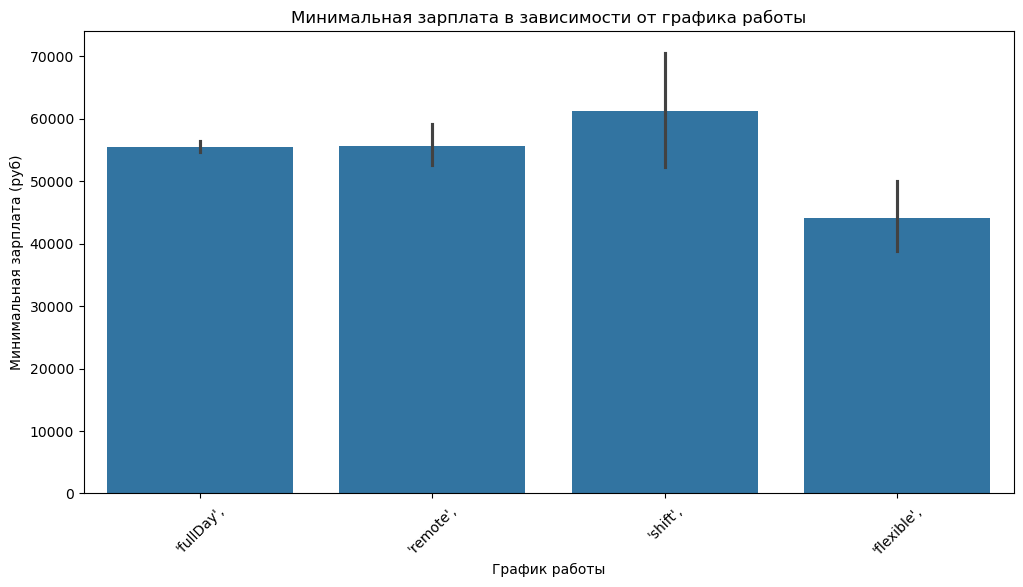

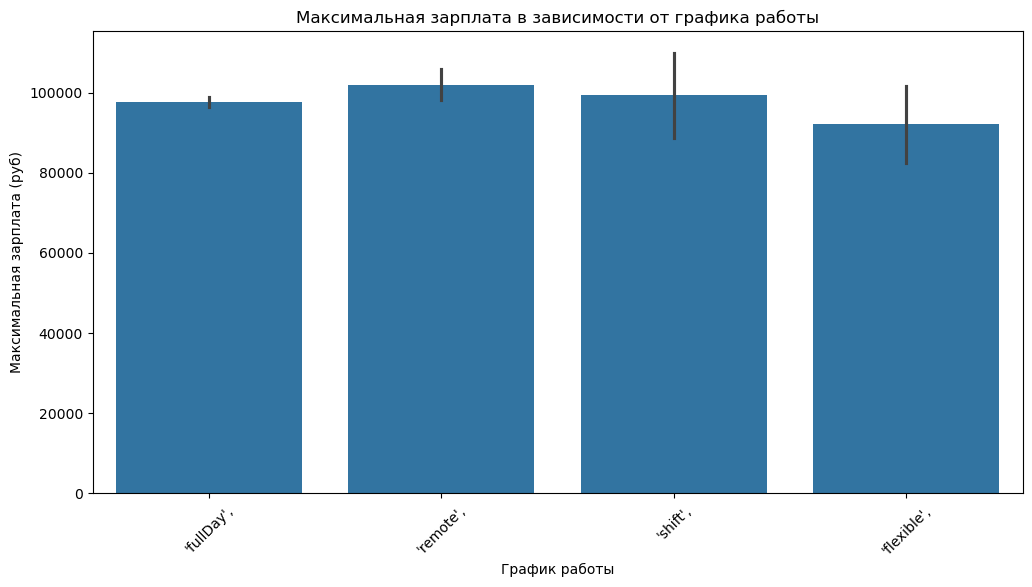

In [15]:
# Сравнение зарплат и требований для различных графиков работы
plt.figure(figsize=(12, 6))
sns.barplot(x='schedule_name', y='salary.from', data=df)
plt.title('Минимальная зарплата в зависимости от графика работы')
plt.xlabel('График работы')
plt.ylabel('Минимальная зарплата (руб)')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='schedule_name', y='salary.to', data=df)
plt.title('Максимальная зарплата в зависимости от графика работы')
plt.xlabel('График работы')
plt.ylabel('Максимальная зарплата (руб)')
plt.xticks(rotation=45)
plt.show()

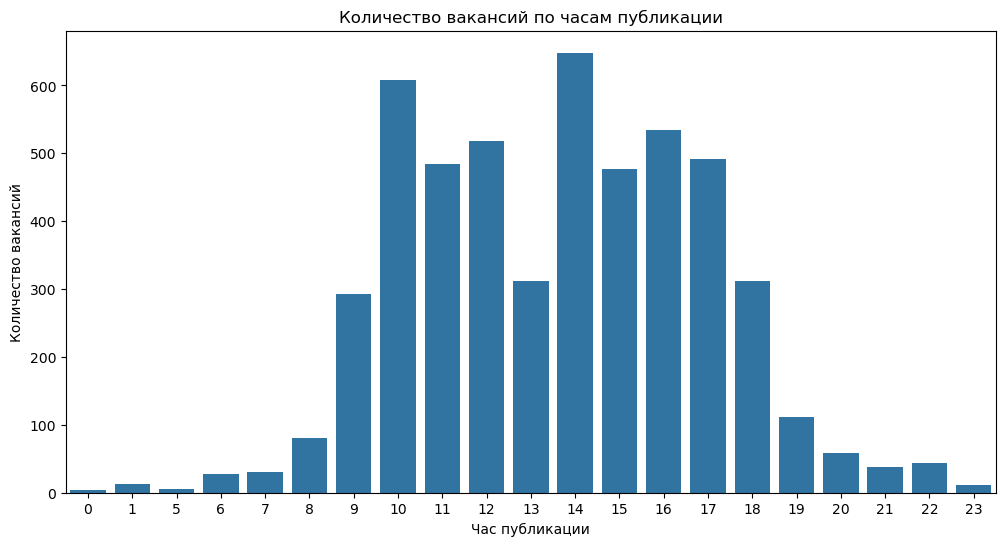

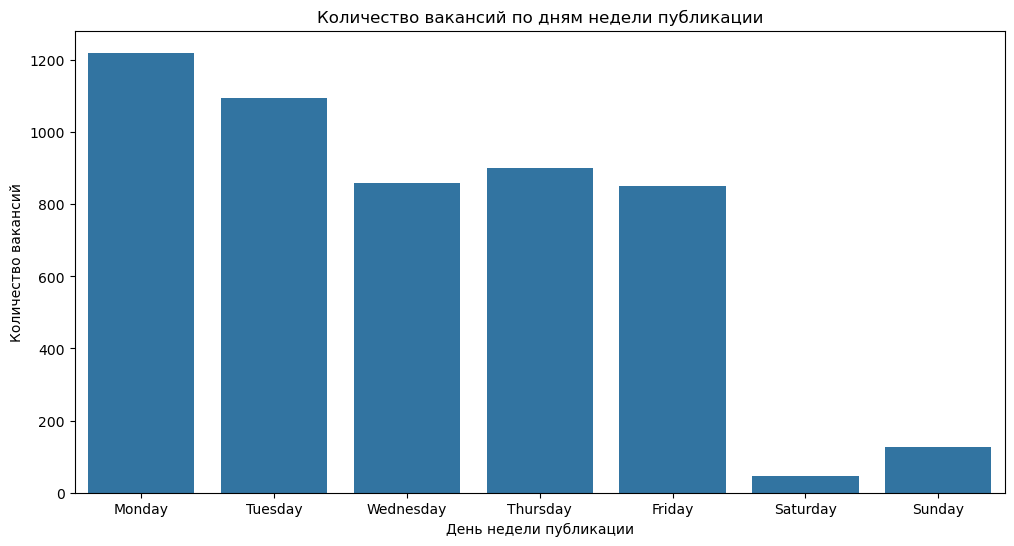

In [16]:
# Временные тенденции публикации вакансий
df['published_hour'] = df['published_at'].dt.hour
df['published_day_of_week'] = df['published_at'].dt.day_name()

plt.figure(figsize=(12, 6))
sns.countplot(x='published_hour', data=df)
plt.title('Количество вакансий по часам публикации')
plt.xlabel('Час публикации')
plt.ylabel('Количество вакансий')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='published_day_of_week', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Количество вакансий по дням недели публикации')
plt.xlabel('День недели публикации')
plt.ylabel('Количество вакансий')
plt.show()

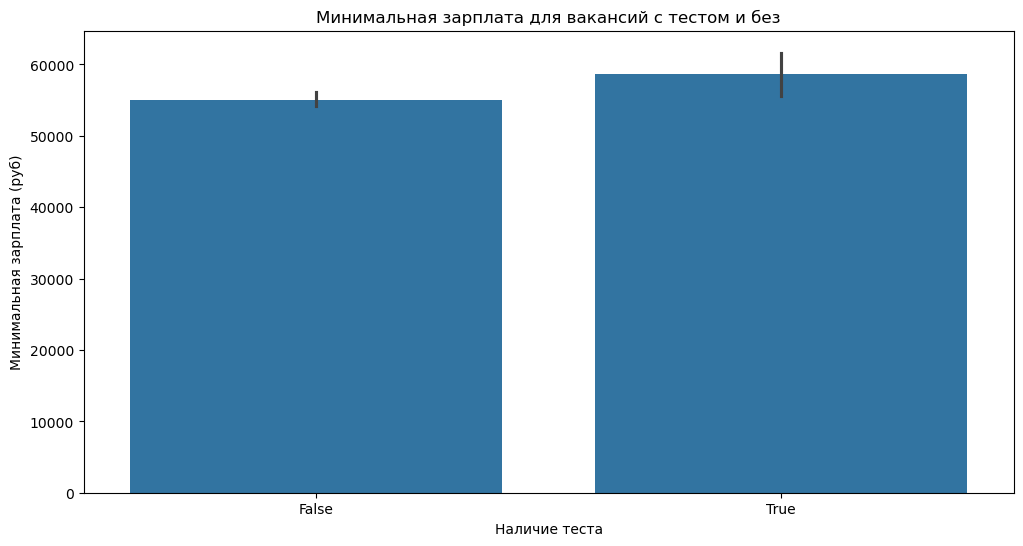

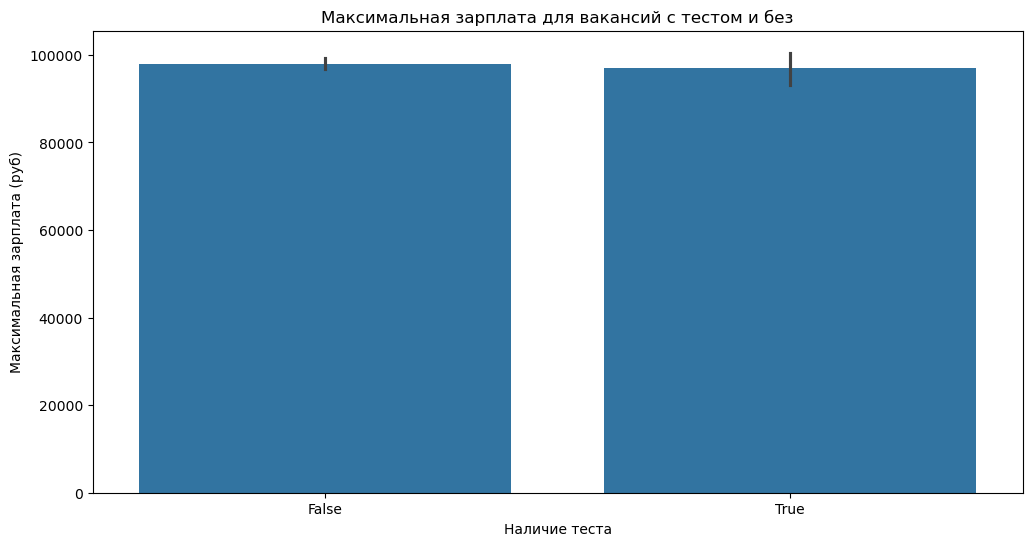

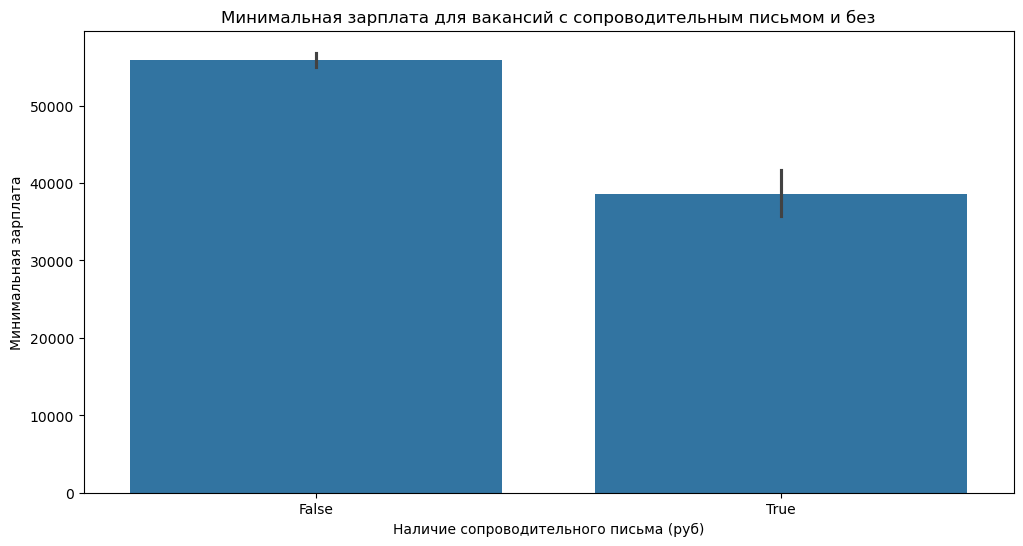

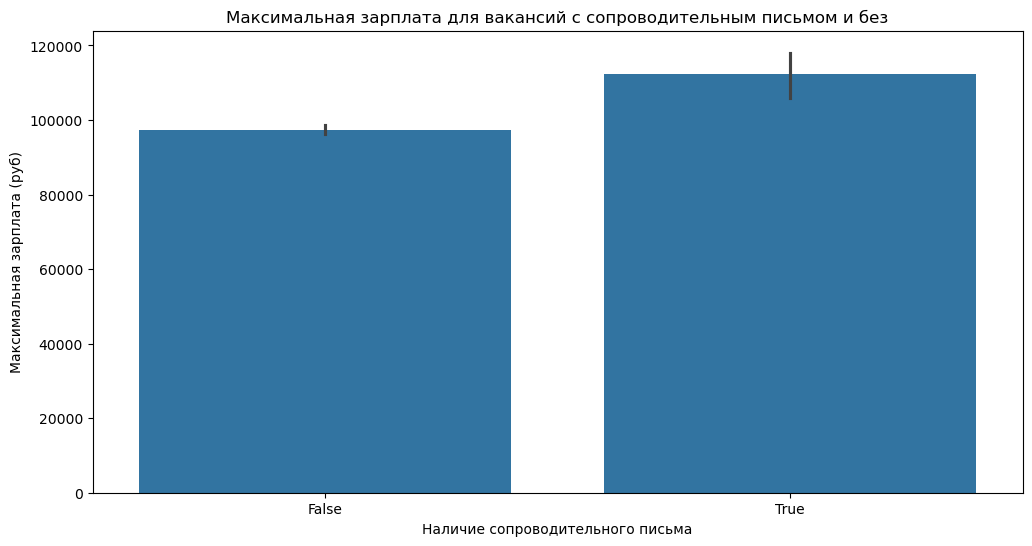

In [17]:
# Особенности вакансий, требующих прохождения теста или сопроводительного письма
test_required_vacancies = df[df['has_test'] == True]
letter_required_vacancies = df[df['response_letter_required'] == True]

plt.figure(figsize=(12, 6))
sns.barplot(x='has_test', y='salary.from', data=df)
plt.title('Минимальная зарплата для вакансий с тестом и без')
plt.xlabel('Наличие теста')
plt.ylabel('Минимальная зарплата (руб)')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='has_test', y='salary.to', data=df)
plt.title('Максимальная зарплата для вакансий с тестом и без')
plt.xlabel('Наличие теста')
plt.ylabel('Максимальная зарплата (руб)')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='response_letter_required', y='salary.from', data=df)
plt.title('Минимальная зарплата для вакансий с сопроводительным письмом и без')
plt.xlabel('Наличие сопроводительного письма (руб)')
plt.ylabel('Минимальная зарплата')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='response_letter_required', y='salary.to', data=df)
plt.title('Максимальная зарплата для вакансий с сопроводительным письмом и без')
plt.xlabel('Наличие сопроводительного письма')
plt.ylabel('Максимальная зарплата (руб)')
plt.show()

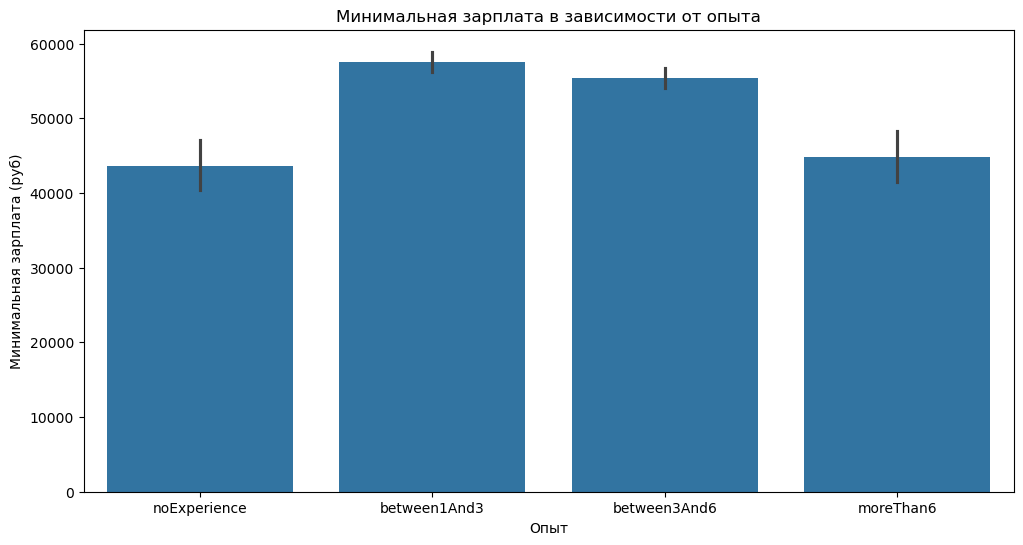

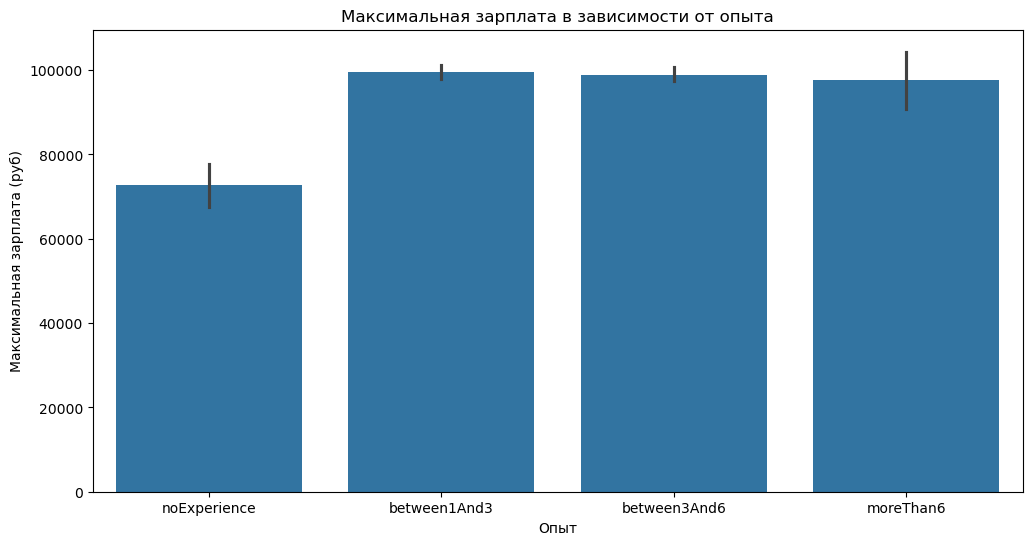

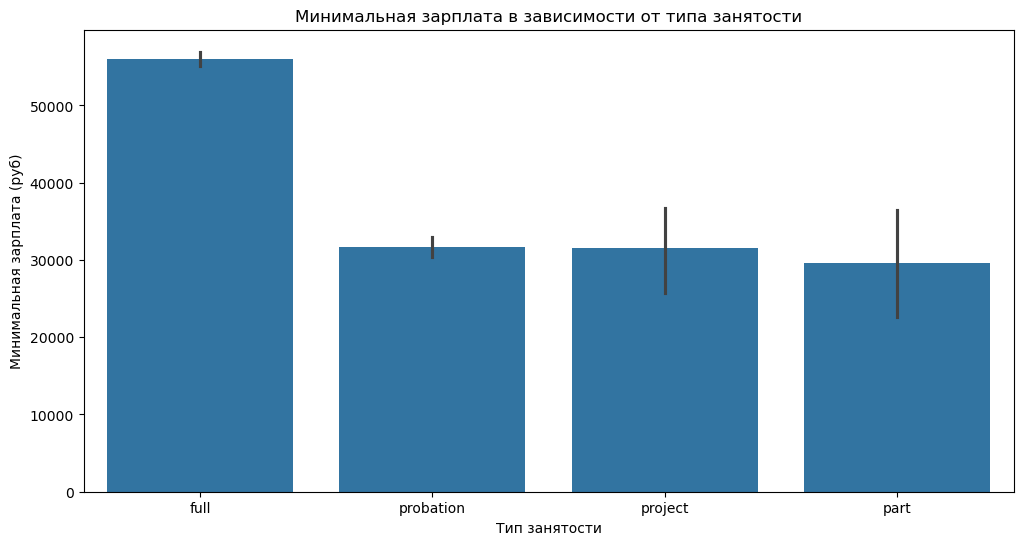

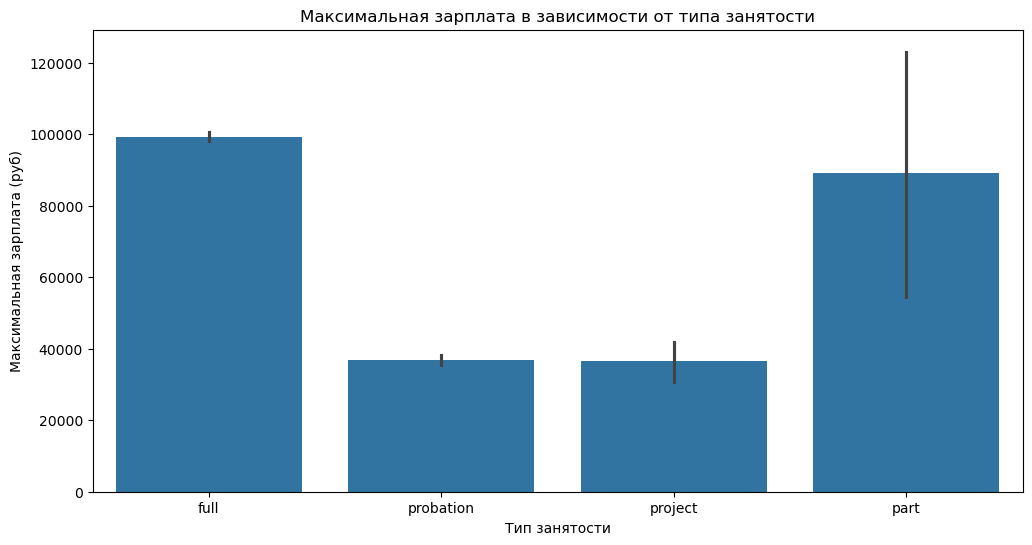

In [19]:
# Анализ зарплат в зависимости от профессиональной роли, опыта и типа занятости

plt.figure(figsize=(12, 6))
sns.barplot(x='experience', y='salary.from', data=df, order=experience_order)
plt.title('Минимальная зарплата в зависимости от опыта')
plt.xlabel('Опыт')
plt.ylabel('Минимальная зарплата (руб)')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='experience', y='salary.to', data=df, order=experience_order)
plt.title('Максимальная зарплата в зависимости от опыта')
plt.xlabel('Опыт')
plt.ylabel('Максимальная зарплата (руб)')
plt.show()

# Анализ зарплат в зависимости от типа занятости
plt.figure(figsize=(12, 6))
sns.barplot(x='employment', y='salary.from', data=df)
plt.title('Минимальная зарплата в зависимости от типа занятости')
plt.xlabel('Тип занятости')
plt.ylabel('Минимальная зарплата (руб)')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='employment', y='salary.to', data=df)
plt.title('Максимальная зарплата в зависимости от типа занятости')
plt.xlabel('Тип занятости')
plt.ylabel('Максимальная зарплата (руб)')
plt.show()